## Looking for Mislabelled Data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import math
%matplotlib inline

In [2]:
#Import Fuel "decoder ring"
DecodeFuel=pd.read_csv('WIFIRE/Data_labels/fuel_labels.csv')
DecodeFuel.columns=["filename",'id','fuelLabel']
#DecodeFuel["id"]=DecodeFuel["id"].apply(lambda x: str(x))
DecodeFuel

,filename,id,fuelLabel
0,FBFM1,1,Short Grass
1,FBFM2,2,Timber Grass
2,FBFM3,3,Tall Grass
3,FBFM4,4,Chaparral
4,FBFM5,5,Brush
5,FBFM6,6,Dormant Brush
6,FBFM7,7,Southern Rough
7,FBFM8,8,Compact Timber Litter
8,FBFM9,9,Hardwood Litter
9,FBFM10,10,Timber Understory


** Transition Analysis **

Here we will import the  2014 Tile Reference that contains the 2014 label as well as the 2010 and 2012 fuel label.

In [47]:
Tran=pd.read_csv('WIFIRE/Processed_Data/Joins/AllFuelYears_18May2017.csv')
Tran.head()

,FuelFileIndex,Fuel2014,Lat,Long,TileName,lrx,lry,ulx,uly,Fuel2012,Fuel2010
0,0,91,33.147027,-117.205855,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205703,33.146875,-117.206007,33.147179,91,91
1,1,1,33.147027,-117.205551,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205400,33.146875,-117.205703,33.147179,91,1
2,2,1,33.147027,-117.205248,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205096,33.146875,-117.205400,33.147179,1,1
3,3,91,33.147027,-117.204944,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204793,33.146875,-117.205096,33.147179,1,91
4,4,91,33.147027,-117.204641,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204489,33.146875,-117.204793,33.147179,91,91


In [48]:
# Look for changes
Changes=[]
for index, row in Tran.iterrows():
    if row['Fuel2014']!=row['Fuel2012']:
        C1214=True
    else:
        C1214=False
    if row['Fuel2012']==row['Fuel2010']:
        C1012=False
    else:
        C1012=True
    Changes.append([C1214,C1012])

Tran=pd.concat([Tran,pd.DataFrame(Changes,columns=['Change2012-2014','Change2010-2012'])],axis=1)
Tran.head()

,FuelFileIndex,Fuel2014,Lat,Long,TileName,lrx,lry,ulx,uly,Fuel2012,Fuel2010,Change2012-2014,Change2010-2012
0,0,91,33.147027,-117.205855,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205703,33.146875,-117.206007,33.147179,91,91,False,False
1,1,1,33.147027,-117.205551,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205400,33.146875,-117.205703,33.147179,91,1,True,True
2,2,1,33.147027,-117.205248,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205096,33.146875,-117.205400,33.147179,1,1,False,False
3,3,91,33.147027,-117.204944,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204793,33.146875,-117.205096,33.147179,1,91,True,True
4,4,91,33.147027,-117.204641,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204489,33.146875,-117.204793,33.147179,91,91,False,False


20165


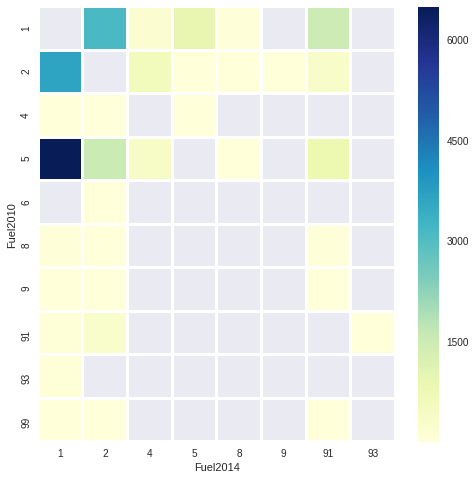

In [5]:
# 2010 = 2012 but changed 2014
Same1012_Change14=Tran[(Tran['Change2012-2014']==True)&(Tran['Change2010-2012']==False)]
print(Same1012_Change14.shape[0])

#What are the transitions?
Change=Same1012_Change14.groupby(['Fuel2010','Fuel2014'])['FuelFileIndex'].count().rename('Count').reset_index()
plt.figure(figsize=(8,8))
crosstab = pd.crosstab(Change["Fuel2010"], Change["Fuel2014"], values=Change["Count"], aggfunc=np.sum)
ax = sns.heatmap(crosstab,  linewidths=2, cmap="YlGnBu")

20165


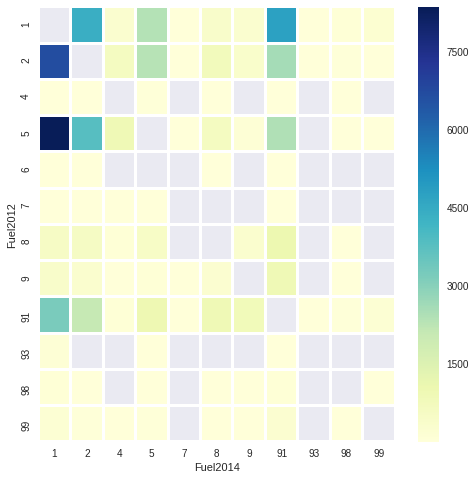

In [6]:
# changed from 2012 to 2014
Change1214=Tran[(Tran['Change2012-2014']==True)]
print(Same1012_Change14.shape[0])

#What are the transitions?
Change=Change1214.groupby(['Fuel2012','Fuel2014'])['FuelFileIndex'].count().rename('Count').reset_index()
plt.figure(figsize=(8,8))
crosstab = pd.crosstab(Change["Fuel2012"], Change["Fuel2014"], values=Change["Count"], aggfunc=np.sum)
ax = sns.heatmap(crosstab,  linewidths=2, cmap="YlGnBu")

** Vegetation & Fuel Mappings **

In [7]:
VF=pd.read_csv('WIFIRE/Processed_Data/Joins/Fuel_Veg_2014_18May2017.csv')
VF.head()

,FuelFileIndex,Fuel2014,Lat,Long,TileName,lrx,lry,ulx,uly,Veg2014
0,0,91,33.147027,-117.205855,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205703,33.146875,-117.206007,33.147179,3296
1,1,1,33.147027,-117.205551,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205400,33.146875,-117.205703,33.147179,3913
2,2,1,33.147027,-117.205248,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205096,33.146875,-117.205400,33.147179,3913
3,3,91,33.147027,-117.204944,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204793,33.146875,-117.205096,33.147179,3299
4,4,91,33.147027,-117.204641,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204489,33.146875,-117.204793,33.147179,3299


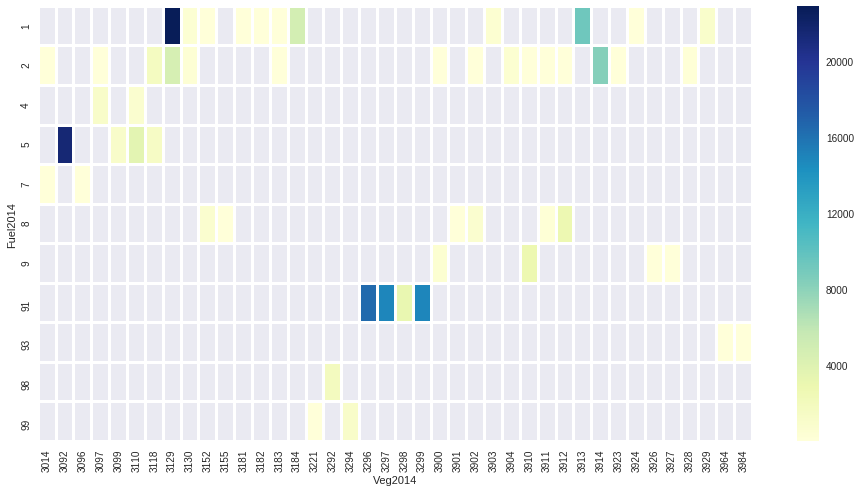

In [9]:
#What are the transitions?
Change=VF.groupby(['Fuel2014','Veg2014'])['FuelFileIndex'].count().rename('Count').reset_index()
plt.figure(figsize=(16,8))
crosstab = pd.crosstab(Change["Fuel2014"], Change["Veg2014"], values=Change["Count"], aggfunc=np.sum)
ax = sns.heatmap(crosstab,  linewidths=2, cmap="YlGnBu")

In [10]:
DecodeVeg=pd.read_csv('WIFIRE/Data_labels/veg_labels.csv')
DecodeVeg.columns=["id","vegLabel"]
DecodeVeg.head()

,id,vegLabel
0,3738,Open Water
1,3805,Water
2,3859,Water
3,3887,Water
4,3737,Snow-Ice


In [20]:
A=Change['Veg2014'].sort_values().unique()
for a in A:
    print (a, DecodeVeg[DecodeVeg['id']==a]['vegLabel'].values[0])

3014 Central and Southern California Mixed Evergreen Woodland
3092 Southern California Coastal Scrub
3096 California Maritime Chaparral
3097 California Mesic Chaparral
3099 California Xeric Serpentine Chaparral
3110 Southern California Dry-Mesic Chaparral
3118 Southern California Oak Woodland and Savanna
3129 California Central Valley and Southern Coastal Grassland
3130 California Mesic Serpentine Grassland
3152 California Montane Riparian Systems
3155 North American Warm Desert Riparian Forest and Woodland
3181 Introduced Upland Vegetation-Annual Grassland
3182 Introduced Upland Vegetation-Perennial Grassland and Forbland
3183 Introduced Upland Vegetation-Annual and Biennial Forbland
3184 California Annual Grassland
3221 Mediterranean California Sparsely Vegetated Systems II
3292 Open Water
3294 Barren
3296 Developed-Low Intensity
3297 Developed-Medium Intensity
3298 Developed-High Intensity
3299 Developed-Roads
3900 Western Cool Temperate Urban Deciduous Forest
3901 Western Cool Temp

In [23]:
A=Change['Fuel2014'].sort_values().unique()
for a in A:
    print (a, DecodeFuel[DecodeFuel['id']==a]['fuelLabel'].values[0])

1 Short Grass
2 Timber Grass
4 Chaparral
5 Brush
7 Southern Rough
8 Compact Timber Litter
9 Hardwood Litter
91 Urban
93 Agriculture
98 water
99 Barren


**Clustering**

Pooja ran  engineered features through K-Means clustering with 2 clusters and found that  basically there was a "Urban Cluster" and an "Everything Else Cluster".  From  there , she looked at those pixels labelled Urban and created two lists based on which cluster they fell into:
* PossibleUrban -- Not labelled urban but was clustered with Urban pixels
* Questionable Urban -- Is labelled urban but was clusterd with  non-urban pixels

In [52]:
PossibleUrban=pd.read_table('PossibleUrban', sep=',')
print (PossibleUrban.shape)

PossibleUrban['FileName']=PossibleUrban['Image'].apply(lambda x: x.split('/')[-1])
PossibleUrban['FuelFileIndex']=PossibleUrban['FileName'].apply(lambda x: int(x.split('_')[3][3:]))
PossibleUrban.head()

(9043, 2)


,Image,label,FileName,FuelFileIndex
0,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Short Grass,FuelTile_2014_Created18May2017_Idx1_1.jpg,1
1,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Short Grass,FuelTile_2014_Created18May2017_Idx2_1.jpg,2
2,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Timber Grass,FuelTile_2014_Created18May2017_Idx5_2.jpg,5
3,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Short Grass,FuelTile_2014_Created18May2017_Idx63_1.jpg,63
4,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Hardwood Litter,FuelTile_2014_Created18May2017_Idx75_9.jpg,75


In [54]:
QuestionableUrban=pd.read_table('QuestionableUrban',sep=',')
print (QuestionableUrban.shape)

QuestionableUrban['FileName']=QuestionableUrban['Image'].apply(lambda x: x.split('/')[-1])
QuestionableUrban['FuelFileIndex']=QuestionableUrban['FileName'].apply(lambda x: int(x.split('_')[3][3:]))
QuestionableUrban.head()

(21461, 2)


,Image,label,FileName,FuelFileIndex
0,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Urban,FuelTile_2014_Created18May2017_Idx14_91.jpg,14
1,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Urban,FuelTile_2014_Created18May2017_Idx20_91.jpg,20
2,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Urban,FuelTile_2014_Created18May2017_Idx31_91.jpg,31
3,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Urban,FuelTile_2014_Created18May2017_Idx57_91.jpg,57
4,JPG_Files/2014Fuel_18May2017/FuelTile_2014_Cre...,Urban,FuelTile_2014_Created18May2017_Idx60_91.jpg,60


** Combine methods**

Focusing on Urban, let's see if we can identify  any pixels as being mislabelled  using all 3 methods.  We will start with those labels that  are not Urban but the 3 methods indicate that they  maybe they should be.

In [45]:
Tran['FileName']=Tran['TileName'].apply(lambda x: x.split('/')[-1])


In [49]:
#Possible Urban From Transition Analysis: Was Urban in 2010 & 2012 but not in 2014
PU1_Tran=Tran[(Tran["Fuel2010"]==91)&(Tran["Fuel2012"]==91)&(Tran["Fuel2014"]!=91)]
print (PU1_Tran.shape)
PU1_Tran.head()


(341, 13)


,FuelFileIndex,Fuel2014,Lat,Long,TileName,lrx,lry,ulx,uly,Fuel2012,Fuel2010,Change2012-2014,Change2010-2012
5,5,2,33.147027,-117.204338,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204186,33.146875,-117.204489,33.147179,91,91,True,False
352,352,2,33.146724,-117.204338,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204186,33.146572,-117.204489,33.146875,91,91,True,False
518,518,2,33.146724,-117.153964,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.153812,33.146572,-117.154116,33.146875,91,91,True,False
581,581,2,33.146724,-117.134846,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.134695,33.146572,-117.134998,33.146875,91,91,True,False
582,582,2,33.146724,-117.134543,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.134391,33.146572,-117.134695,33.146875,91,91,True,False


In [50]:
# Or Possible Urban from Transition Analysus: Was urban in 2012 and not in 2014
PU2_Tran=Tran[(Tran["Fuel2012"]==91)&(Tran["Fuel2014"]!=91)]
print (PU2_Tran.shape)
PU2_Tran.head()

(8397, 13)


,FuelFileIndex,Fuel2014,Lat,Long,TileName,lrx,lry,ulx,uly,Fuel2012,Fuel2010,Change2012-2014,Change2010-2012
1,1,1,33.147027,-117.205551,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.205400,33.146875,-117.205703,33.147179,91,1,True,True
5,5,2,33.147027,-117.204338,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.204186,33.146875,-117.204489,33.147179,91,91,True,False
58,58,1,33.147027,-117.188254,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.188103,33.146875,-117.188406,33.147179,91,1,True,True
63,63,1,33.147027,-117.186737,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.186585,33.146875,-117.186889,33.147179,91,1,True,True
64,64,1,33.147027,-117.186434,/home/mcmccart/WIFIRE/Processed_Data/LabelledT...,-117.186282,33.146875,-117.186585,33.147179,91,1,True,True


Note:  I assume that the following Vegetation types should map to  Urban fuel:
* 3296 Developed-Low Intensity
* 3297 Developed-Medium Intensity
* 3298 Developed-High Intensity
* 3299 Developed-Roads

Looking at the graph above, we see that only Urban fuel is linked with these Veg types.  Veg/Fuel mapping will not help us with  Urban mislabelled pixels

In [56]:
# Find Pixels that Clustering and Transition Analysis have in common:
PU_Clu_T1=pd.merge(PU1_Tran,PossibleUrban,on='FuelFileIndex',how='inner')
print(PU_Clu_T1.shape)

PU_Clu_T2=pd.merge(PU2_Tran,PossibleUrban,on='FuelFileIndex',how='inner')
print(PU_Clu_T2.shape)

(104, 16)
(1646, 16)


In [113]:
PU_Clu_T1['Fuel2014'].value_counts()

#Looks like most of these are Timber Grass.
#That makes sense because we know Timber Grass is used strategically around the border of Urban areas


2    97
1     7
Name: Fuel2014, dtype: int64

In [112]:
PU_Clu_T2['Fuel2014'].value_counts()

1     651
2     442
9     181
8     142
99    113
5      85
98     27
4       5
Name: Fuel2014, dtype: int64

In [73]:
# import matplotlib.image as mpimg
# path='WIFIRE/Processed_Data/LabelledTiles_Fuel_EqualArea/JPG_Files/2014Fuel_18May2017/'

# image_full = mpimg.imread(path+'FuelTile_2014_Created18May2017_Idx5_2.jpg')
# fig = plt.figure(figsize=(4,3))
# fig.suptitle("Image ", fontsize= 16)
# plt.axis('off')
# plt.imshow(image_full)

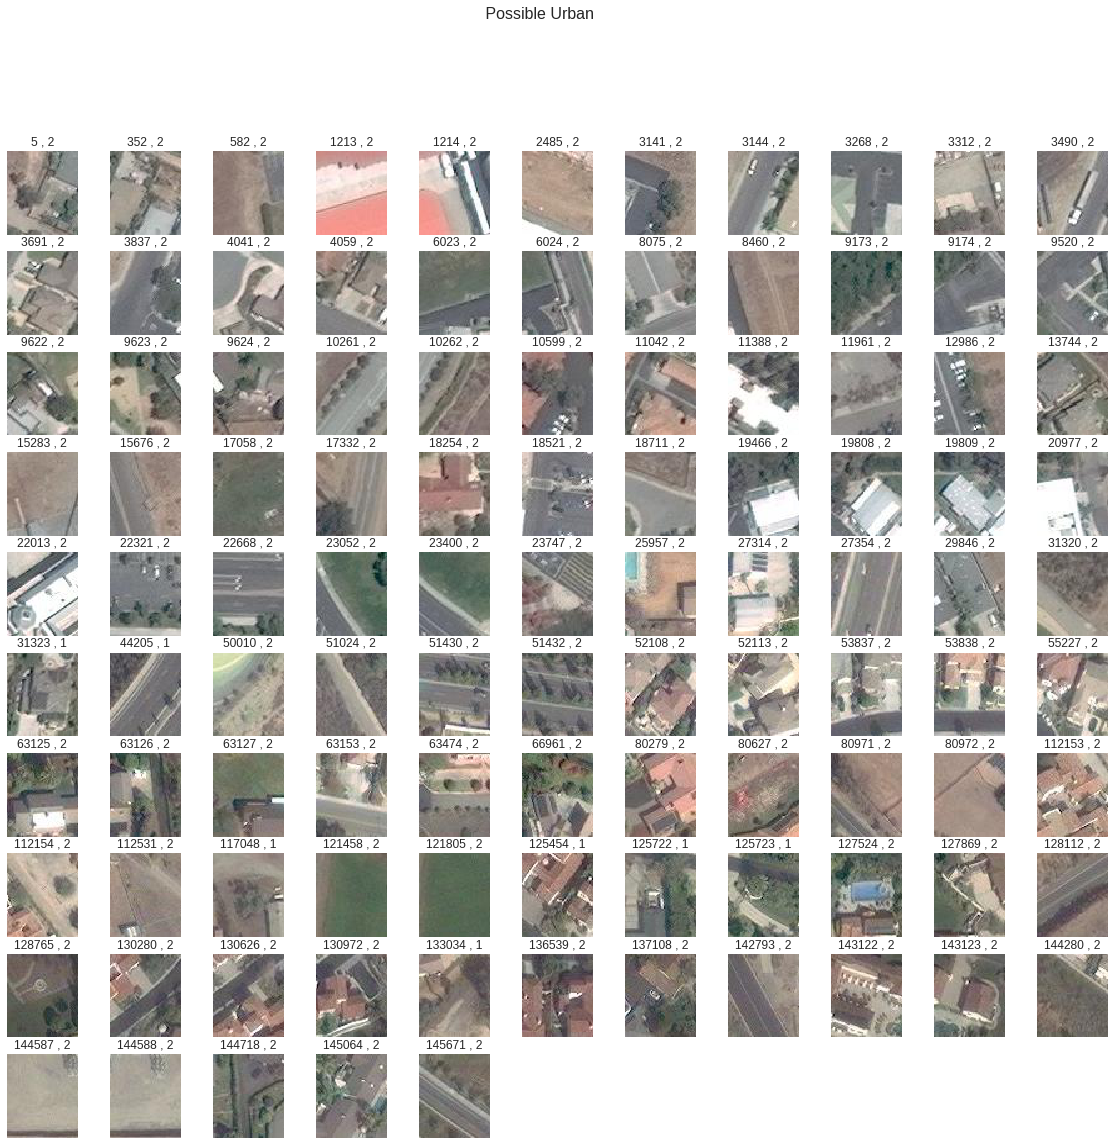

In [115]:
path='WIFIRE/Processed_Data/LabelledTiles_Fuel_EqualArea/JPG_Files/2014Fuel_18May2017/'
fig = plt.figure(figsize=(20,20))
fig.suptitle(" Possible Urban ", fontsize= 16)
fig.subplots_adjust() 
j=0
v=math.ceil(math.sqrt(PU_Clu_T1.shape[0]))
for T in list(PU_Clu_T1['FileName'].values):
    ax = fig.add_subplot(v,v,j+1, xticks=[], yticks=[])
    image = mpimg.imread(path+ T)      
    ax.imshow(image)
    t=T.split('_')
    Ind=t[3][3:]
    L=t[4].split('.')[0]
    ax.set_title(Ind+' , '+L) 
    j+=1 

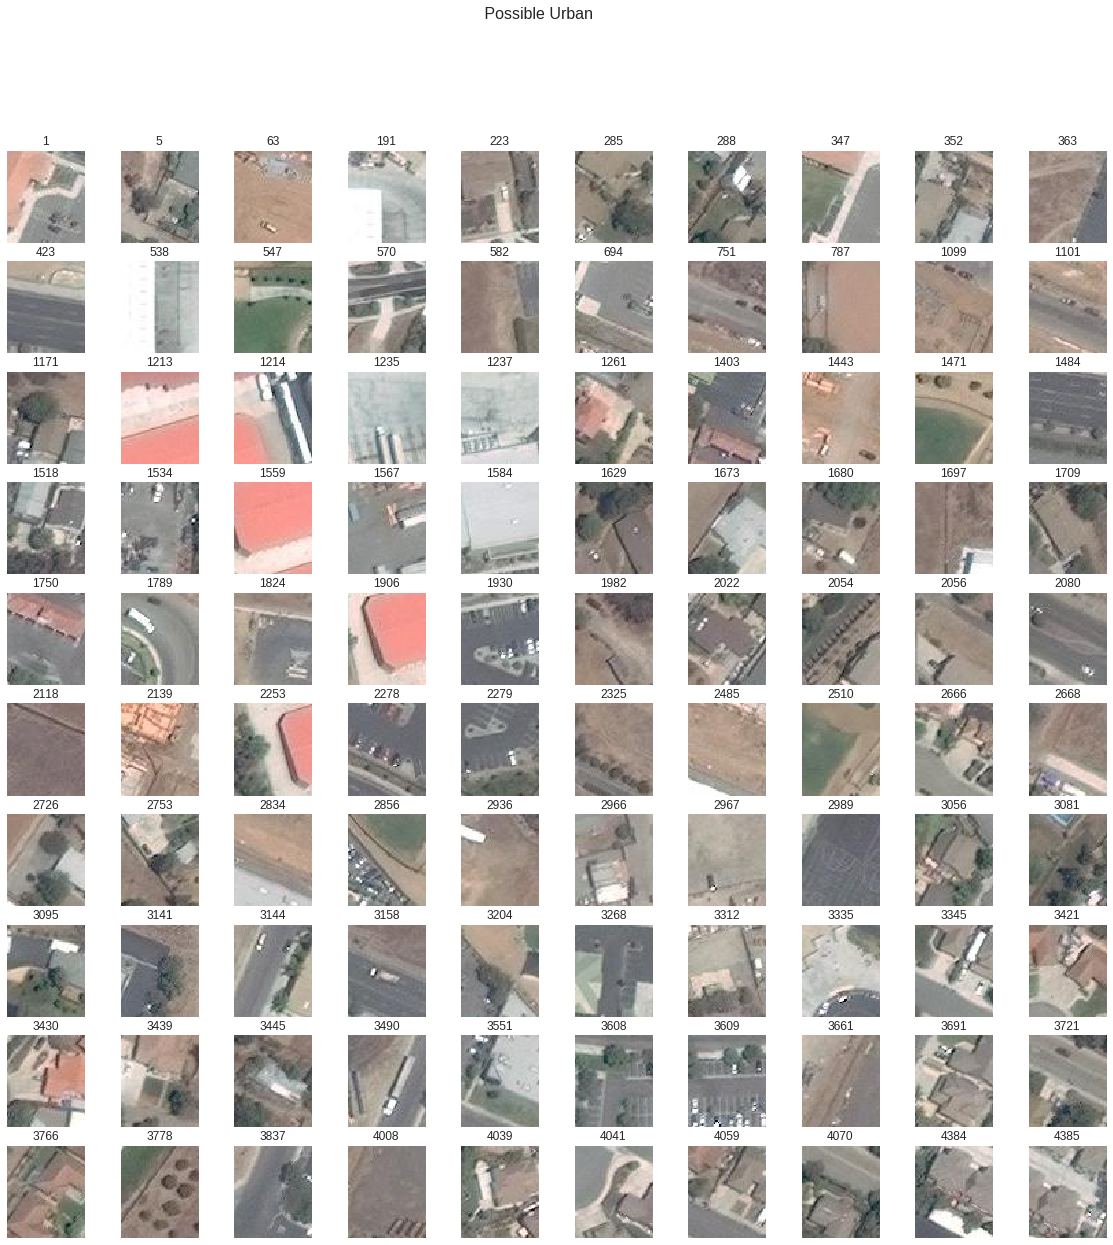

In [74]:
path='WIFIRE/Processed_Data/LabelledTiles_Fuel_EqualArea/JPG_Files/2014Fuel_18May2017/'
fig = plt.figure(figsize=(20,20))
fig.suptitle(" Possible Urban ", fontsize= 16)
fig.subplots_adjust() 
j=0
#v=math.ceil(math.sqrt(PU_Clu_T1.shape[0]))
for T in list(PU_Clu_T2['FileName'].values)[:100]:
    ax = fig.add_subplot(10,10,j+1, xticks=[], yticks=[])
    image = mpimg.imread(path+ T)      
    ax.imshow(image)
    Ind=T.split('_')[3][3:]
    ax.set_title(Ind) 
    j+=1 

I think I need to see this on a map

In [87]:
def ImportPreserve(FileName,labelName):
    DF=pd.read_table(FileName, header=None)
    DF.columns=['Row']
    DF["LONG"]=DF["Row"].apply(lambda x: x.split(" ")[0])
    DF["LAT"]=DF["Row"].apply(lambda x: x.split(" ")[1])
    DF[labelName]=DF["Row"].apply(lambda x: x.split(" ")[2])
    del DF["Row"]
    return DF

Clean=ImportPreserve('WIFIRE/Data_Prep_Work_Flow/Clipped_Files/Clip_Fuel2014_Escondido_18May2017_IndexOnly.xyz','FuelFileIndex')
Clean['FuelFileIndex']=Clean['FuelFileIndex'].apply(lambda x: int(x))

In [122]:
DF=pd.merge(PU_Clu_T1,Clean,on='FuelFileIndex',how='right')
def ReplaceNan(x):
    if x>0: #NotNull
        return x
    else:
        return 0
DF['Fuel2014']=DF['Fuel2014'].apply(lambda x: ReplaceNan(x))
DF=DF.sort_values('FuelFileIndex')
DF[["LONG", "LAT","Fuel2014"]].to_csv('PossibleUrban1.xyz',sep=' ', index=False, header=False)
gdal_str="/opt/anaconda3/bin/gdal_translate PossibleUrban1.xyz PossibleUrban1.tif"
os.system(gdal_str)

0

In [123]:
DF2=pd.merge(PU_Clu_T2,Clean,on='FuelFileIndex',how='right')
def ReplaceNan(x):
    if x>0: #NotNull
        return x
    else:
        return 0
DF2['Fuel2014']=DF2['Fuel2014'].apply(lambda x: ReplaceNan(x))
DF2=DF2.sort_values('FuelFileIndex')
DF2[["LONG", "LAT","Fuel2014"]].to_csv('PossibleUrban2.xyz',sep=' ', index=False, header=False)
gdal_str="/opt/anaconda3/bin/gdal_translate PossibleUrban2.xyz PossibleUrban2.tif"
os.system(gdal_str)

0

Now let's look at Questionable Urban

In [124]:
#Questionable Urban From Transition Analysis: Was not Urban in 2012 but is in 2014
QU_Tran=Tran[(Tran["Fuel2012"]!=91)&(Tran["Fuel2014"]==91)]
print (QU_Tran.shape)


(12177, 13)


In [125]:
# Find Pixels that Clustering and Transition Analysis have in common:
QU_Clu_T=pd.merge(QU_Tran,QuestionableUrban,on='FuelFileIndex',how='inner')
print(QU_Clu_T.shape)

(7004, 16)


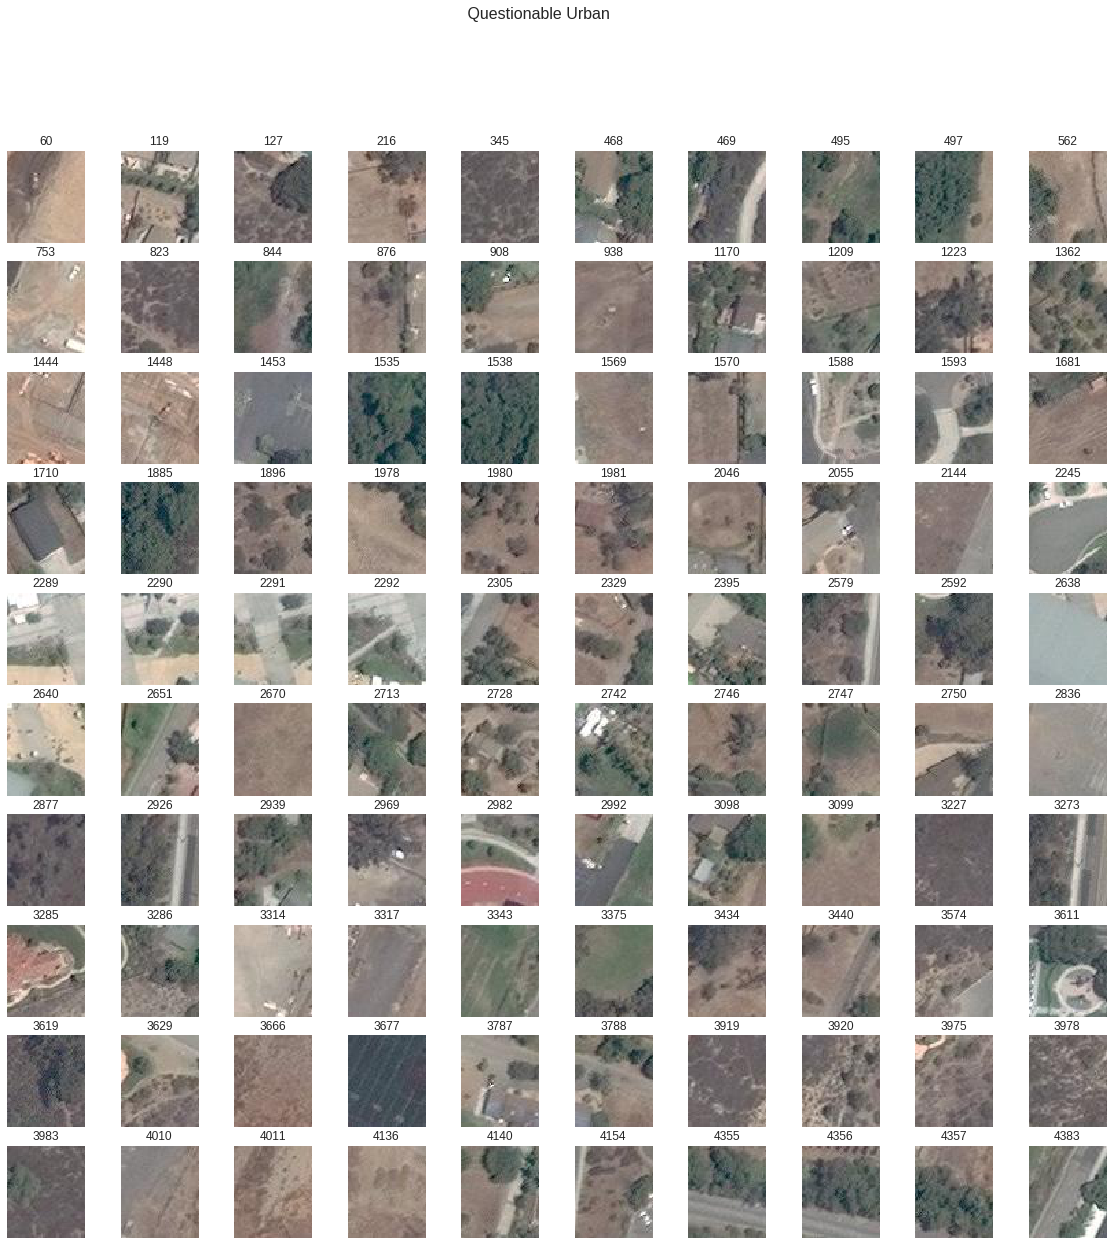

In [127]:
path='WIFIRE/Processed_Data/LabelledTiles_Fuel_EqualArea/JPG_Files/2014Fuel_18May2017/'
fig = plt.figure(figsize=(20,20))
fig.suptitle(" Questionable Urban ", fontsize= 16)
fig.subplots_adjust() 
j=0
for T in list(QU_Clu_T['FileName'].values)[:100]:
    ax = fig.add_subplot(10,10,j+1, xticks=[], yticks=[])
    image = mpimg.imread(path+ T)      
    ax.imshow(image)
    Ind=T.split('_')[3][3:]
    ax.set_title(Ind) 
    j+=1 

In [129]:
DF3=pd.merge(QU_Clu_T,Clean,on='FuelFileIndex',how='right')
def ReplaceNan(x):
    if x>0: #NotNull
        return x
    else:
        return 0
DF3['Fuel2014']=DF3['Fuel2014'].apply(lambda x: ReplaceNan(x))
DF3=DF3.sort_values('FuelFileIndex')
DF3[["LONG", "LAT","Fuel2014"]].to_csv('QuestionableUrban.xyz',sep=' ', index=False, header=False)
gdal_str="/opt/anaconda3/bin/gdal_translate QuestionableUrban.xyz QuestionableUrban.tif"
os.system(gdal_str)

0